In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from itertools import product

In [9]:
# Load the datasets
df_test = pd.read_csv('CustomerSatisfaction/test.csv')
df_train = pd.read_csv('CustomerSatisfaction/train.csv')

print(df_train.columns)


Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [4]:
# Initial exploration of training data

df_train.head() # display first few rows of training data
# df_train.info() # check data types and non-null counts
# df_train.describe() # include numerical columns
# df_train.describe(include='object') # include categorical columns
# df_train.isnull().sum() # check for missing values

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
# df_train.dtypes # check data types

## Create a dataframe of categorical variables

df_train_cat = pd.DataFrame(data = df_train.dtypes[df_train.dtypes == 'object']).reset_index()
df_train_cat.columns = ['Feature', 'Type']

cat_var = list(df_train_cat['Feature'].loc[df_train_cat['Type'] == 'object'])

df_train_cat = df_train[cat_var]
df_train_cat.head()

# df_train_cat.isnull().sum() # there are no missing values in categorical variables

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


In [6]:
## Want to determine the relationship between categorical variables and target variable 'satisfaction'

for col in df_train_cat.columns:
    if col != 'satisfaction':
        contingency_table = pd.crosstab(df_train_cat[col], df_train_cat['satisfaction'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-squared test for {col} vs satisfaction: chi2 = {chi2}, p = {p}")

Chi-squared test for Gender vs satisfaction: chi2 = 15.44441742614322, p = 8.496755458033522e-05
Chi-squared test for Customer Type vs satisfaction: chi2 = 3657.2808045981465, p = 0.0
Chi-squared test for Type of Travel vs satisfaction: chi2 = 20945.233826061667, p = 0.0
Chi-squared test for Class vs satisfaction: chi2 = 26471.86294449228, p = 0.0


In [ ]:
cat_var_new = ('Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction')

cat_var_new2 = ('Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction')

cat_var_prod = list(product(cat_var_new, cat_var_new2, repeat=1))

## Create an empty var and only get p value from Chi-Square test

p_values = []

for i in cat_var_prod:
    if i[0] != i[1] and i[1] == 'satisfaction':
        contingency_table = pd.crosstab(df_train_cat[i[0]], df_train_cat[i[1]])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        p_values.append((i[0], p))

print(p_values)

## Output shows that all categorical variables have a significant relationship with the target variable 'satisfaction' (p < 0.05)

[('Gender', 8.496755458033522e-05), ('Customer Type', 0.0), ('Type of Travel', 0.0), ('Class', 0.0)]


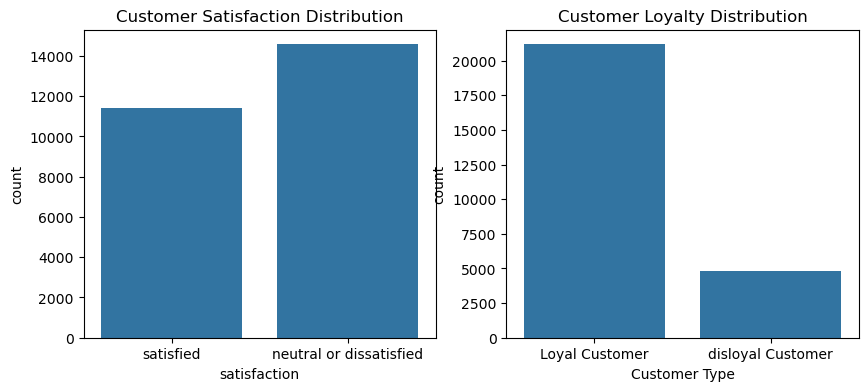

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(x='satisfaction', data=df_test, ax=axes[0])
axes[0].set_title('Customer Satisfaction Distribution')

sns.countplot(x='Customer Type', data=df_test, ax=axes[1])
axes[1].set_title('Customer Loyalty Distribution')
plt.show()

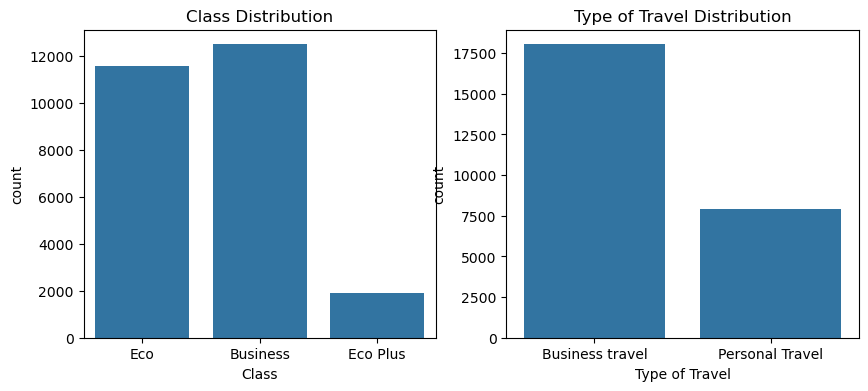

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(x='Class', data=df_test, ax=axes[0])
axes[0].set_title('Class Distribution')

sns.countplot(x='Type of Travel', data=df_test, ax=axes[1])
axes[1].set_title('Type of Travel Distribution')
plt.show()

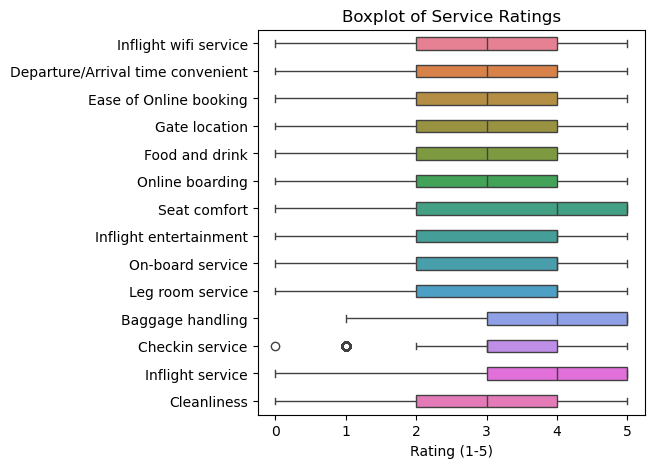

In [34]:
# Visualize ratings distribution
rating_cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
               'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 
               'Inflight entertainment', 'On-board service', 'Leg room service', 
               'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=df_train[rating_cols], orient='h', gap=.1, width=.5)
# sns.yticks(ticks=np.arange(1, len(rating_cols) + 1), labels=rating_cols)
plt.title('Boxplot of Service Ratings')
plt.xlabel('Rating (1-5)')
plt.show()
